In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [8]:

# Load and preprocess the data
import numpy as np
import json

def load_data(train_file_path, test_file_path):
    """
    Load training and test data from JSON files and return as arrays.

    Parameters:
    train_file_path (str): Path to the training JSON file.
    test_file_path (str): Path to the test JSON file.

    Returns:
    tuple: X_train, y_train, X_test arrays
    """
    # Load the JSON data
    with open(train_file_path) as train_file:
        train_data = json.load(train_file)
    with open(test_file_path) as test_file:
        test_data = json.load(test_file)
    
    # Extract features and labels, convert to numpy arrays
    X_train = np.array([np.array(instance['band_1'], dtype=np.float32).reshape(75, 75) for instance in train_data])
    X_test = np.array([np.array(instance['band_1'], dtype=np.float32).reshape(75, 75) for instance in test_data])
    y_train = np.array([instance['is_iceberg'] for instance in train_data], dtype=np.float32)
    
    return X_train, y_train, X_test

# Usage example:
# X_train, y_train, X_test = load_data('path/to/train.json', 'path/to/test.json')


def normalize(X):
    return (X - np.min(X)) / (np.max(X) - np.min(X))

def preprocess(X):
    X_normalized = np.array([normalize(image) for image in X])
    return X_normalized.reshape(-1, 75, 75, 1)

X_train, y_train, X_test = load_data(r'train.json\data\processed\train.json',r'test.json\data\processed\test.json')
X_train = preprocess(X_train)
X_test = preprocess(X_test)

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [9]:

# Define model hyperparameters
batch_size = 32
num_epochs = 50
kernel_size = 3
pool_size = 2
conv_depth_1 = 32
conv_depth_2 = 64
conv_depth_3 = 128
dense_1 = 128
dense_2 = 1
drop_out = 0.3
weight_decay = 1e-4

# Model architecture with modifications
model = Sequential()
model.add(Conv2D(conv_depth_1, (kernel_size, kernel_size), input_shape=(75, 75, 1), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Conv2D(conv_depth_3, (kernel_size, kernel_size), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Flatten())
model.add(Dense(dense_1, kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(Dropout(drop_out))

model.add(Dense(dense_2, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



c:\Users\sanba\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:


# Model training
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr]
)

# Save model
model.save_weights('modified_model.weights.h5')


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 307ms/step - accuracy: 0.5809 - loss: 2.5957 - val_accuracy: 0.4953 - val_loss: 0.7304 - learning_rate: 0.0010
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 293ms/step - accuracy: 0.6657 - loss: 0.6402 - val_accuracy: 0.4891 - val_loss: 0.7416 - learning_rate: 0.0010
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 0.7124 - loss: 0.5966 - val_accuracy: 0.4891 - val_loss: 0.7706 - learning_rate: 0.0010
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 255ms/step - accuracy: 0.7307 - loss: 0.5493 - val_accuracy: 0.4891 - val_loss: 0.9636 - learning_rate: 0.0010
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - accuracy: 0.7634 - loss: 0.5021 - val_accuracy: 0.4891 - val_loss: 0.8819 - learning_rate: 5.0000e-04
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 257ms/step - accuracy: 0.8102 - loss: 0.4660 - val_accuracy: 0.4891 - val_loss: 0.9208 - learning_rate: 5.0000e-04
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 256ms/step - accuracy: 0.7970 - 

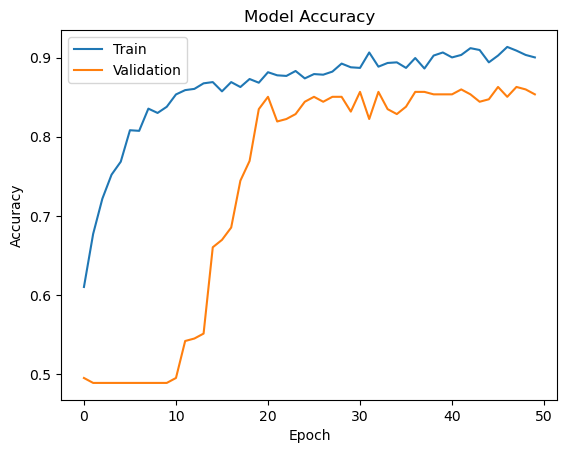

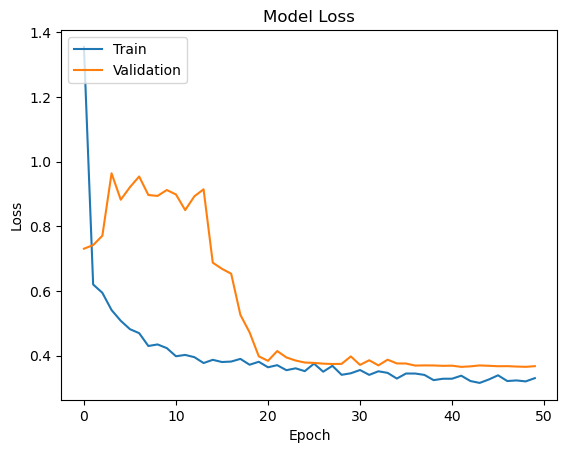

264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step
[[0.10773922]
 [0.80737066]
 [0.18277249]
 [0.9919188 ]
 [0.94463503]]


In [11]:

# Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Prediction example (optional)
predictions = model.predict(X_test)
print(predictions[:5])


In [12]:

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - accuracy: 0.4999 - loss: 5.4829 - val_accuracy: 0.6732 - val_loss: 0.7146 - learning_rate: 0.0010
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.6245 - loss: 0.9461 - val_accuracy: 0.6654 - val_loss: 0.7249 - learning_rate: 0.0010
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 239ms/step - accuracy: 0.6794 - loss: 0.6412 - val_accuracy: 0.5409 - val_loss: 0.7152 - learning_rate: 0.0010
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - accuracy: 0.6942 - loss: 0.5893 - val_accuracy: 0.6576 - val_loss: 0.7132 - learning_rate: 0.0010
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step - accuracy: 0.6945 - loss: 0.5942 - val_accuracy: 0.5331 - val_loss: 0.7401 - learning_rate: 0.0010
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - accuracy: 0.7241 - loss: 0.5488 - val_accuracy: 0.5331 - val_loss: 0.8211 - learning_rate: 0.0010
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 214ms/step - accuracy: 0.7236 - loss: 0.5523 -

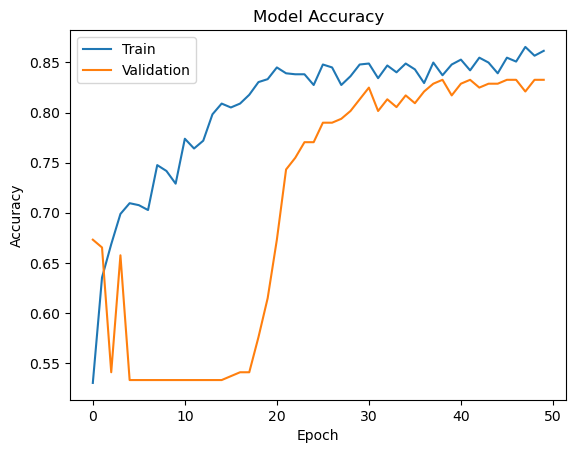

In [13]:

# Define model hyperparameters
batch_size = 32
num_epochs = 50
kernel_size = 3
pool_size = 2
conv_depth_1 = 32
conv_depth_2 = 64
conv_depth_3 = 128
dense_1 = 128
dense_2 = 1
drop_out = 0.3
weight_decay = 1e-4

# Model architecture with modifications
model = Sequential()
model.add(Conv2D(conv_depth_1, (kernel_size, kernel_size), input_shape=(75, 75, 1), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Conv2D(conv_depth_3, (kernel_size, kernel_size), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Flatten())
model.add(Dense(dense_1, kernel_regularizer=l2(weight_decay)))
model.add(Activation('relu'))
model.add(Dropout(drop_out))

model.add(Dense(dense_2, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model training
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr]
)

# Save model
model.save_weights('modified_model.weights.h5')

# Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


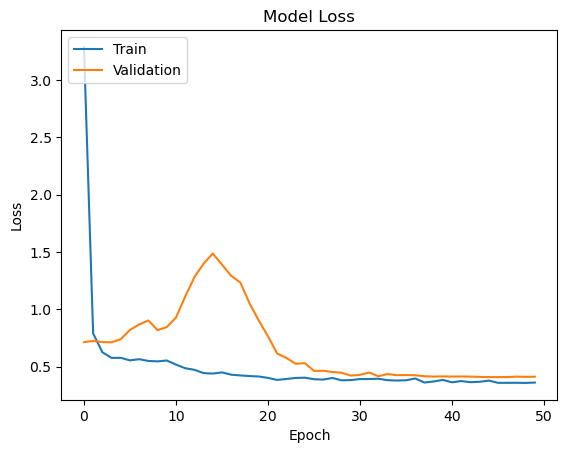

In [14]:

# Plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [15]:

# Prediction example (optional)
predictions = model.predict(X_test)
print(predictions[:5])


264/264 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step
[[0.13961528]
 [0.29620218]
 [0.01766438]
 [0.9715492 ]
 [0.253062  ]]
